# Recognising Handwritten Digits on MNIST Dataset using KNN 

In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

### Data Preparation

In [2]:
df = pd.read_csv('train.csv')
print(df.shape)

(42000, 785)


In [3]:
print(df.columns)

Index(['label', 'pixel0', 'pixel1', 'pixel2', 'pixel3', 'pixel4', 'pixel5',
       'pixel6', 'pixel7', 'pixel8',
       ...
       'pixel774', 'pixel775', 'pixel776', 'pixel777', 'pixel778', 'pixel779',
       'pixel780', 'pixel781', 'pixel782', 'pixel783'],
      dtype='object', length=785)


In [4]:
df.head(n=5)

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
data = df.values
print(data.shape)
print(type(data))

(42000, 785)
<class 'numpy.ndarray'>


In [8]:
X = data[:,1:]
Y = data[:,0]

print(X.shape,Y.shape)

(42000, 784) (42000,)


In [33]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,random_state = 42,test_size = 0.15)

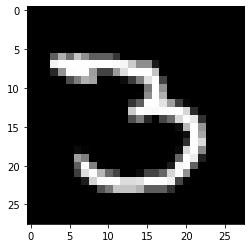

3


In [50]:
#Visualising some Samples
def showImg(sample):
    image = sample.reshape((28,28))
    plt.imshow(image,cmap = "gray")
    plt.show()

showImg(X_train[0])
print(Y_train[0])
    
    

### Implementing KNN 

In [34]:
knn_model = KNeighborsClassifier(n_neighbors = 5)
knn_model.fit(X_train,Y_train)

KNeighborsClassifier()

In [35]:
Y_pred = knn_model.predict(X_test)

In [39]:
c = 0
for i in range(len(Y_pred)):
    if Y_pred[i] == Y_test[i]:
        c += 1

In [52]:
Accuracy = c*100/len(Y_test)
Accuracy

96.44444444444444

In [16]:
#Implementing knn by coding manually
def dist(x1,x2):
    return np.sqrt(sum((x1-x2)**2))

def knn(X,Y,queryPoint,k=5):
    
    vals = []
    m = X.shape[0]
    
    for i in range(m):
        d = dist(queryPoint,X[i])
        vals.append((d,Y[i]))
        
    
    vals = sorted(vals)
    # Nearest/First K points
    vals = vals[:k]
    
    vals = np.array(vals)
    
    #print(vals)
    
    new_vals = np.unique(vals[:,1],return_counts=True)
    #print(new_vals)
    
    index = new_vals[1].argmax()
    pred = new_vals[0][index]
    
    return pred
    
    
    

In [48]:
pred = knn(X_train,Y_train,X_test[1])
print(pred,Y_test[1],Y_pred[1])

1.0 1 1


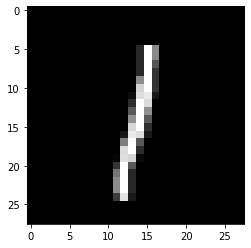

1


In [51]:

showImg(X_test[1])
print(Y_test[1])